<a href="https://colab.research.google.com/github/RoseSarlake/spectral-image/blob/main/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
# Load libraries
import numpy as np # numerical python for ND array
import matplotlib.pyplot as plt # to make plots and show images
import os

Mounted at /content/drive


# 1. Resize ENVI

In [2]:
########### Resize the cube ###########
def resize(path,samples,bands,line_start,line_read):
  fopen = open(path, "rb")
  fopen.seek(samples*bands*line_start*2)
  raw_part = np.fromfile(fopen, dtype=np.uint16, count=samples*bands*line_read)
  cube_part = np.reshape(raw_part, (line_read, bands, samples))
  return cube_part

# 2. Read automatically 

In [3]:
####### Read raw file ##############
def readDir(dir_path):
    myDir = os.listdir(dir_path)
    dark_hdr =[]
    dark_raw=[]
    white_hdr=[]
    white_raw=[]
    for file in myDir:
        if 'dark' in file.lower() and 'hdr' in file.lower():
            #dark_hdr = dir_path + '/' + file
            dark_hdr = os.path.join(dir_path, file)
        if 'dark' in file.lower() and 'raw' in file.lower():
            #dark_raw = dir_path + '/' + file
            dark_raw = os.path.join(dir_path, file)
        if 'white' in file.lower() and 'hdr' in file.lower():
            #white_hdr = dir_path + '/' + file
            white_hdr = os.path.join(dir_path, file)
        if 'white' in file.lower() and 'raw' in file.lower():
            #white_raw = dir_path + '/' + file
            white_raw = os.path.join(dir_path, file)
        if (not 'white' in file.lower()) and (not 'dark' in file.lower()) and 'hdr' in file.lower():
            #object_hdr = dir_path + '/' + file
            object_hdr = os.path.join(dir_path, file)
        if (not 'white' in file.lower()) and (not 'dark' in file.lower()) and 'raw' in file.lower():
            #object_raw = dir_path + '/' + file
            object_raw = os.path.join(dir_path, file)
    return object_raw, object_hdr, white_raw, white_hdr, dark_raw, dark_hdr  

##### Read HDR content ##############
def read_hdr(hdr_path):
    f=open(hdr_path, "r")
    filelines = f.readlines()
    #print(filelines)
    f.close()
    bands = ''
    for fileline in filelines:
        #print(fileline)
        if 'samples' in fileline.lower():
            samples = int(fileline.replace('samples = ',''))
            #print(samples)
        if bands =='' and 'bands' in fileline.lower():
            bands = int(fileline.replace('bands = ',''))
        if 'lines' in fileline.lower():
            lines = int(fileline.replace('lines = ',''))
    # read waves   
    print(samples, bands, lines)
    n = 0
    for fileline in filelines:
        if 'th = {' in fileline.lower():
          #print(n)
          n1 = n+1
        n = n + 1
    n2 = n1 + bands
    waves = np.zeros(n2-n1,)
    n = 0
    for i in range(n1, n2):
        #print(filelines[i])
        waves[n] = float(filelines[i].replace(',',''))
        #print(waves[n])
        n = n + 1
    
    return samples, bands, lines, waves     

In [4]:
################ read wavelength ##############
def read_waves(hdr_path,n_waves):
  f=open(hdr_path, "r")
  filelines = f.readlines()
  #print(filelines)
  f.close()
  waves = np.zeros(n_waves,)
  n = 0
  for i in range(55, 55+n_waves):
    #print(filelines[i])
    waves[n] = float(filelines[i].replace(',',''))
    print(f"{i} ：{waves[n]}nm")
    n = n + 1
#print(waves)  

In [5]:
########## Generate RGB preview ################
def RGB_preview(r,g,b,rgb_image,cube_part):
  rgb_image[:,:,0] = cube_part[:,r,:]/np.amax(cube_part[:,r,:]) # np.amax gets max value. Thus we get RGB in range [0,1]
  rgb_image[:,:,1] = cube_part[:,g,:]/np.amax(cube_part[:,g,:])
  rgb_image[:,:,2] = cube_part[:,b,:]/np.amax(cube_part[:,b,:])
  plt.rcParams['figure.dpi'] = 100
  plt.imshow(rgb_image)
  plt.show()

white correction

In [6]:
###### choose a region ########
def choose_region(x1,x2,y1,y2,cube_part):
  sel = cube_part[y1:y2,:,x1:x2]
  sel1 = np.sum(sel, axis = 0)
  blue = np.sum(sel1, axis =1)/((x2-x1)*(y2-y1))
  return blue


In [7]:
### draw square#####
def draw_square(x1,x2,y1,y2,input_image):
  copy_image = input_image.copy()
  copy_image[y1:y2,x1:x2,0] = 0
  copy_image[y1:y2,x1:x2,1] = 1
  copy_image[y1:y2,x1:x2,2] = 0
  plt.rcParams['figure.dpi'] = 100
  plt.imshow(copy_image)
  plt.show()

# 3. Plot blue spectra from VIS and IR from paintings

In [131]:
path = '/content/drive/MyDrive/ASI/savedata/sample_#1/capture'
[vis_raw, vis_hdr, white_raw, white_hdr, dark_raw, dark_hdr ] = readDir(path)

2144 1080 3202


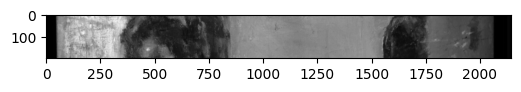

In [132]:
[samples, bands, lines, waves] = read_hdr(vis_hdr)
vis_cut1 = resize(vis_raw,samples,bands,500,200)
plt.rcParams['figure.dpi'] = 100
plt.imshow(vis_cut1[:,450,:], cmap="gray") #vmin=0, vmax=13000)#
plt.show()

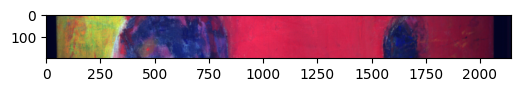

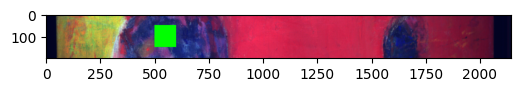

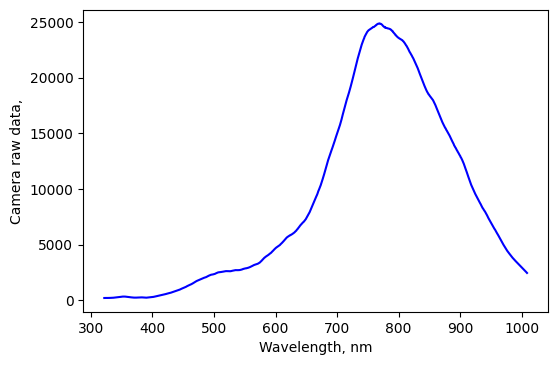

In [137]:
RGB1 = np.empty((200, samples, 3))
RGB_preview(491,348,163,RGB1,vis_cut1)
draw_square(500,600,50,150,RGB1)
blue1 = choose_region(500,600,50,150,vis_cut1)
plt.plot(waves, blue1, "b")
plt.xlabel('Wavelength, nm')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()

2144 1080 238


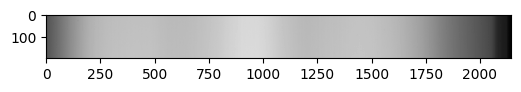

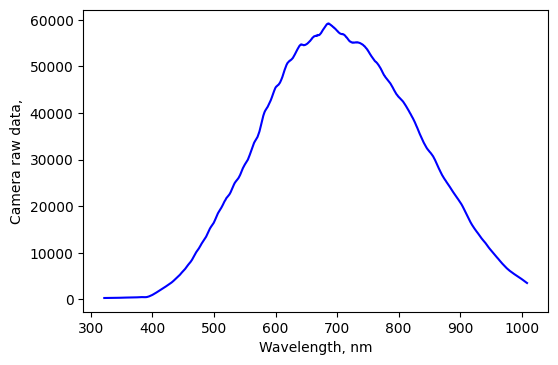

2144 1080 100


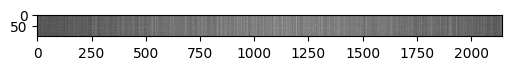

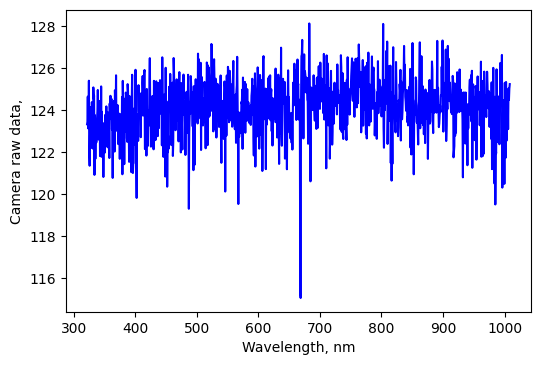

In [138]:
[samples, bands, lines, waves_white1] = read_hdr(white_hdr)
white1 = resize(white_raw,samples,bands,0,200)
plt.rcParams['figure.dpi'] = 100
plt.imshow(white1[:,500,:], cmap="gray", vmin=0, vmax=65000)#
plt.show()
blue1_white = choose_region(1000,1100,100,200,white1)
plt.plot(waves_white1, blue1_white, "b")
plt.xlabel('Wavelength, nm')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()
[samples, bands, lines, waves_dark1] = read_hdr(dark_hdr)
dark1 = resize(dark_raw,samples,bands,0,lines)
plt.rcParams['figure.dpi'] = 100
plt.imshow(dark1[:,500,:], cmap="gray")#
plt.show()
blue1_dark = choose_region(1000,1100,0,100,dark1)
plt.plot(waves_dark1, blue1_dark, "b")
plt.xlabel('Wavelength, nm')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()

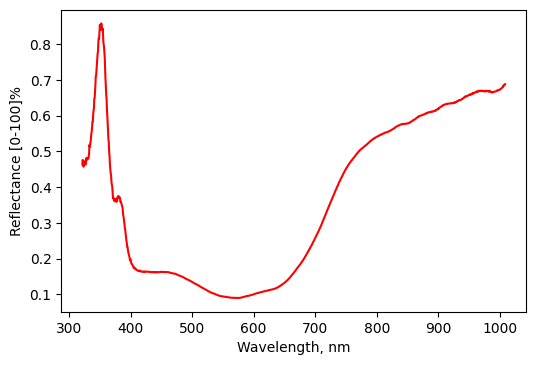

In [139]:
corrected = (blue1-blue1_dark)/(blue1_white-blue1_dark)
plt.plot(waves, corrected, "r")

plt.xlabel('Wavelength, nm')
plt.ylabel('Reflectance [0-100]%')
plt.show()


In [140]:
path = '/content/drive/MyDrive/ASI/savedata/IR_sample_#1/capture'
[ir_raw, ir_hdr, white_raw_ir, white_hdr_ir, dark_raw_ir, dark_hdr_ir] = readDir(path)

320 256 491


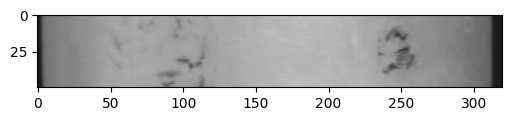

In [141]:
[samples_ir, bands_ir, lines_ir, waves_ir] = read_hdr(ir_hdr)
ir_cut1 = resize(ir_raw,samples_ir,bands_ir,75,50)
plt.rcParams['figure.dpi'] = 100
plt.imshow(ir_cut1[:,150,:], cmap="gray", vmin=0, vmax=13000)#
plt.show()

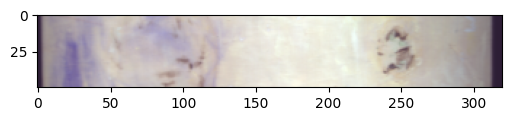

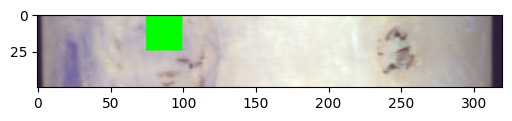

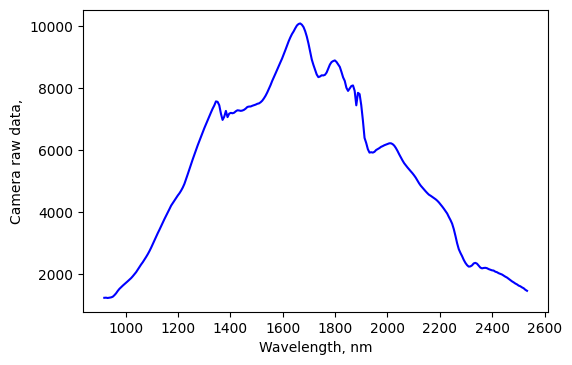

In [142]:
RGB1_ir = np.empty((50, samples_ir, 3))
RGB_preview(50,100,200,RGB1_ir,ir_cut1)
draw_square(75,100,0,25,RGB1_ir)
blue1_ir = choose_region(75,100,0,25,ir_cut1)
plt.plot(waves_ir, blue1_ir, "b")
plt.xlabel('Wavelength, nm')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()

320 256 92


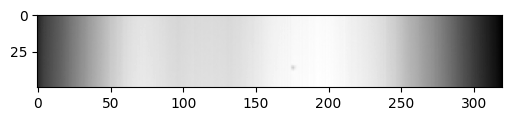

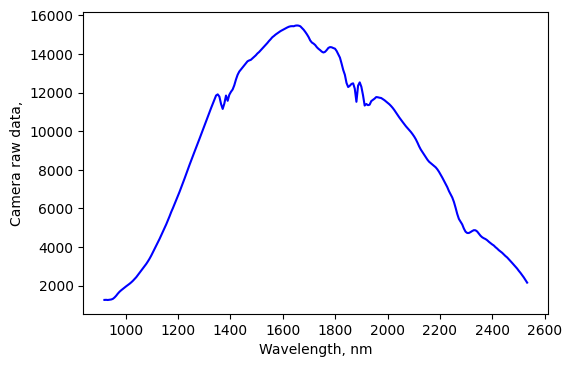

320 256 100


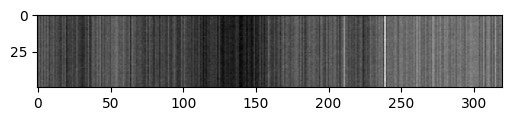

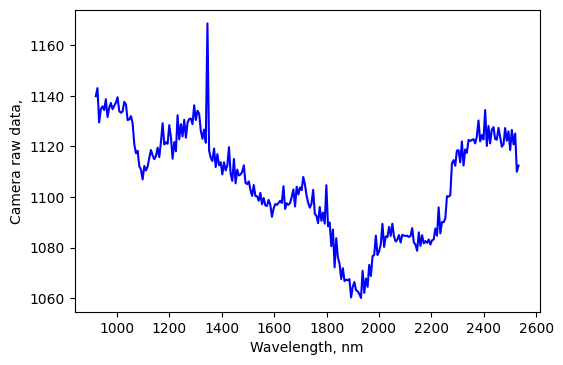

In [143]:
[samples, bands, lines, waves_white1_ir] = read_hdr(white_hdr_ir)
white1_ir = resize(white_raw_ir,samples,bands,0,50)
plt.rcParams['figure.dpi'] = 100
plt.imshow(white1_ir[:,100,:], cmap="gray")#
plt.show()
blue1_white_ir = choose_region(75,100,0,25,white1_ir)
plt.plot(waves_white1_ir, blue1_white_ir, "b")
plt.xlabel('Wavelength, nm')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()
[samples, bands, lines, waves_dark1_ir] = read_hdr(dark_hdr_ir)
dark1_ir = resize(dark_raw_ir,samples,bands,0,50)
plt.rcParams['figure.dpi'] = 100
plt.imshow(dark1_ir[:,100,:], cmap="gray")#
plt.show()
blue1_dark_ir = choose_region(75,100,0,25,dark1_ir)
plt.plot(waves_dark1_ir, blue1_dark_ir, "b")
plt.xlabel('Wavelength, nm')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()

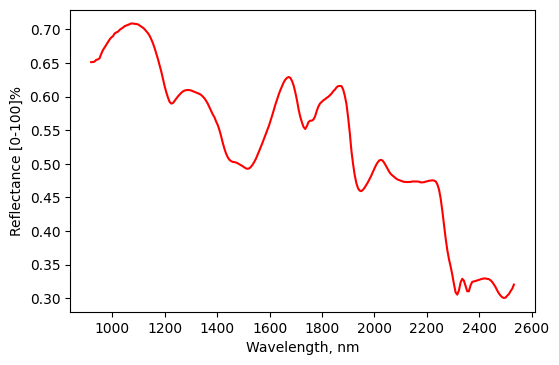

In [144]:
corrected_ir = (blue1_ir-blue1_dark_ir)/(blue1_white_ir-blue1_dark_ir)
plt.plot(waves_ir, corrected_ir, "r")

plt.xlabel('Wavelength, nm')
plt.ylabel('Reflectance [0-100]%')
plt.show()


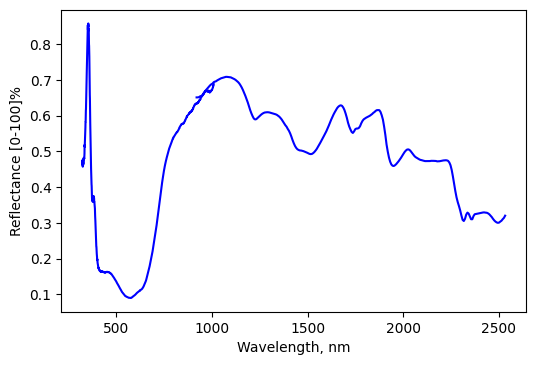

In [145]:
plt.plot(waves, corrected, "b")
plt.plot(waves_ir, corrected_ir, "b")
plt.xlabel('Wavelength, nm')
plt.ylabel('Reflectance [0-100]%')
plt.show()

In [146]:
######## save a copy #######
blue6 = corrected.copy()
blue6_ir = corrected_ir.copy()
waves6 = waves.copy()
waves6_ir = waves_ir.copy()

# Painting No.7

In [230]:
path = '/content/drive/MyDrive/ASI/savedata/sample_#4/capture'
[vis_raw, vis_hdr, white_raw, white_hdr, dark_raw, dark_hdr ] = readDir(path)

2144 1080 2428


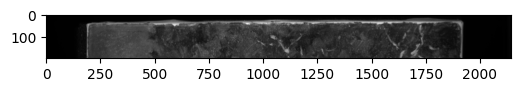

In [231]:
[samples, bands, lines, waves] = read_hdr(vis_hdr)
vis_cut1 = resize(vis_raw,samples,bands,0,200)
plt.rcParams['figure.dpi'] = 100
plt.imshow(vis_cut1[:,500,:], cmap="gray") #vmin=0, vmax=13000)#
plt.show()

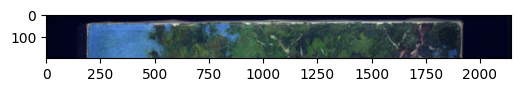

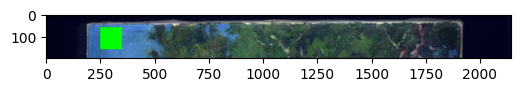

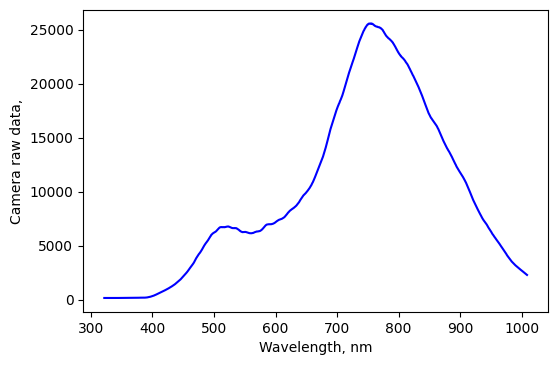

In [232]:
RGB1 = np.empty((200, samples, 3))
RGB_preview(491,348,163,RGB1,vis_cut1)
draw_square(250,350,60,160,RGB1)
blue1 = choose_region(250,350,60,160,vis_cut1)
plt.plot(waves, blue1, "b")
plt.xlabel('Wavelength, nm')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()

2144 1080 284


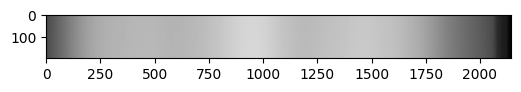

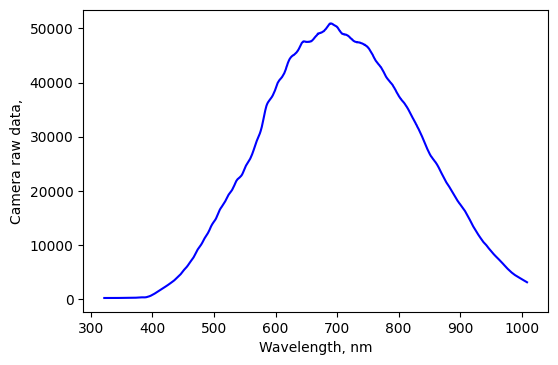

2144 1080 100


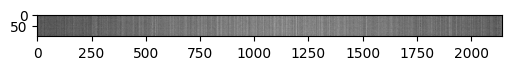

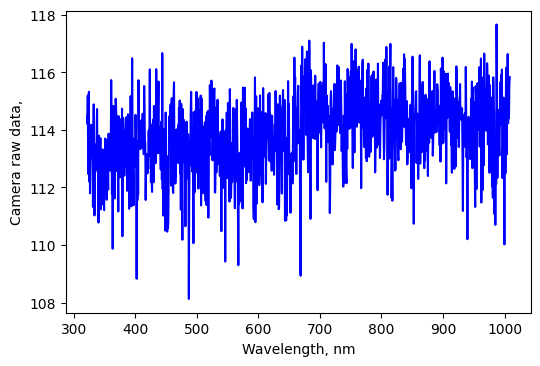

In [233]:
[samples, bands, lines, waves_white1] = read_hdr(white_hdr)
white1 = resize(white_raw,samples,bands,0,200)
plt.rcParams['figure.dpi'] = 100
plt.imshow(white1[:,500,:], cmap="gray", vmin=0, vmax=65000)#
plt.show()
blue1_white = choose_region(250,350,100,200,white1)
plt.plot(waves_white1, blue1_white, "b")
plt.xlabel('Wavelength, nm')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()
[samples, bands, lines, waves_dark1] = read_hdr(dark_hdr)
dark1 = resize(dark_raw,samples,bands,0,lines)
plt.rcParams['figure.dpi'] = 100
plt.imshow(dark1[:,500,:], cmap="gray")#
plt.show()
blue1_dark = choose_region(250,350,0,100,dark1)
plt.plot(waves_dark1, blue1_dark, "b")
plt.xlabel('Wavelength, nm')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()

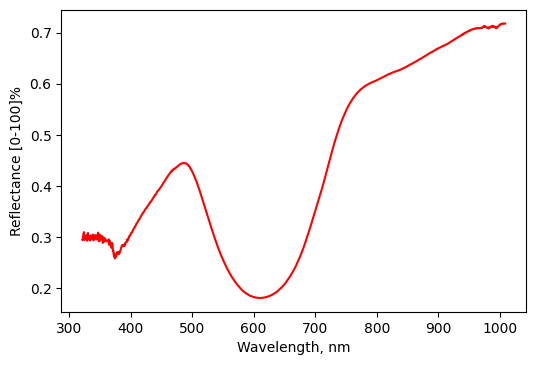

In [234]:
corrected = (blue1-blue1_dark)/(blue1_white-blue1_dark)
plt.plot(waves, corrected, "r")

plt.xlabel('Wavelength, nm')
plt.ylabel('Reflectance [0-100]%')
plt.show()


In [235]:
path = '/content/drive/MyDrive/ASI/savedata/IR_sample_#4/capture'
[ir_raw, ir_hdr, white_raw_ir, white_hdr_ir, dark_raw_ir, dark_hdr_ir] = readDir(path)

320 256 492


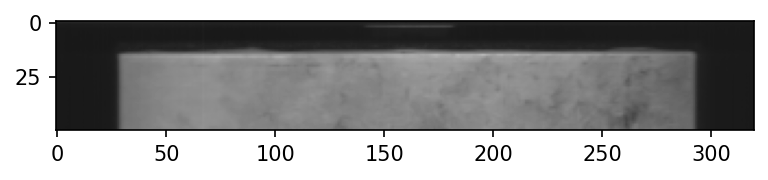

In [236]:
[samples_ir, bands_ir, lines_ir, waves_ir] = read_hdr(ir_hdr)
ir_cut1 = resize(ir_raw,samples_ir,bands_ir,0,50)
plt.rcParams['figure.dpi'] = 150
plt.imshow(ir_cut1[:,150,:], cmap="gray", vmin=0, vmax=13000)#
plt.show()

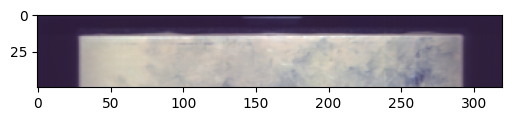

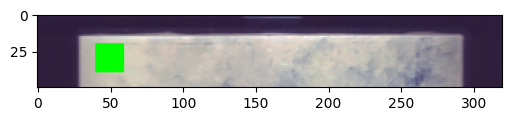

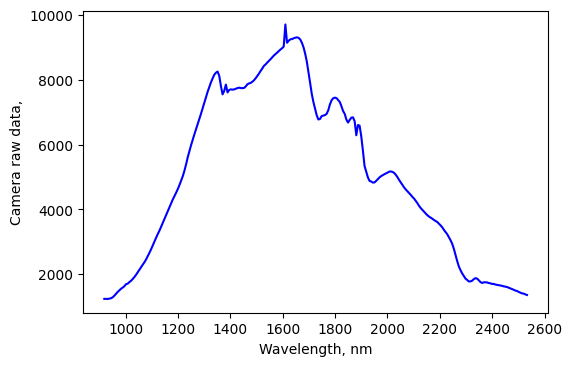

In [237]:
RGB1_ir = np.empty((50, samples_ir, 3))
RGB_preview(50,100,200,RGB1_ir,ir_cut1)
draw_square(40,60,20,40,RGB1_ir)
blue1_ir = choose_region(40,60,20,40,ir_cut1)
plt.plot(waves_ir, blue1_ir, "b")
plt.xlabel('Wavelength, nm')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()

320 256 91


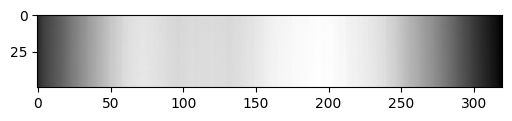

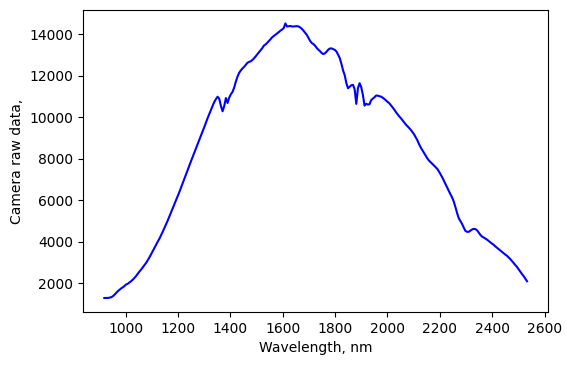

320 256 100


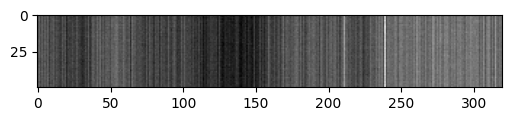

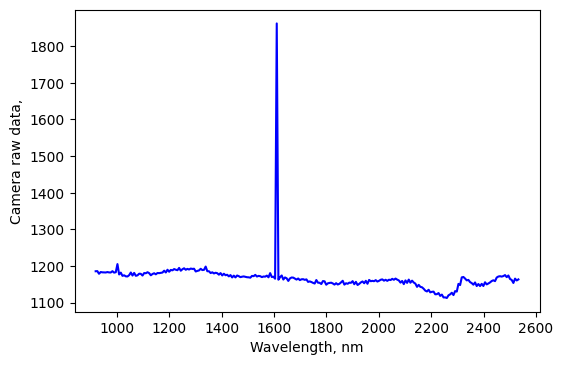

In [238]:
[samples, bands, lines, waves_white1_ir] = read_hdr(white_hdr_ir)
white1_ir = resize(white_raw_ir,samples,bands,0,50)
plt.rcParams['figure.dpi'] = 100
plt.imshow(white1_ir[:,100,:], cmap="gray")#
plt.show()
blue1_white_ir = choose_region(40,60,20,40,white1_ir)
plt.plot(waves_white1_ir, blue1_white_ir, "b")
plt.xlabel('Wavelength, nm')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()
[samples, bands, lines, waves_dark1_ir] = read_hdr(dark_hdr_ir)
dark1_ir = resize(dark_raw_ir,samples,bands,0,50)
plt.rcParams['figure.dpi'] = 100
plt.imshow(dark1_ir[:,100,:], cmap="gray")#
plt.show()
blue1_dark_ir = choose_region(40,60,20,40,dark1_ir)
plt.plot(waves_dark1_ir, blue1_dark_ir, "b")
plt.xlabel('Wavelength, nm')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()

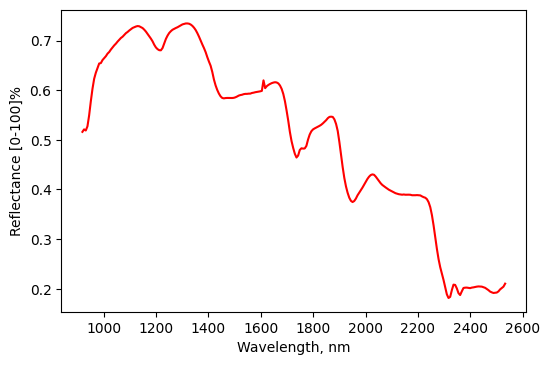

In [239]:
corrected_ir = (blue1_ir-blue1_dark_ir)/(blue1_white_ir-blue1_dark_ir)
plt.plot(waves_ir, corrected_ir, "r")

plt.xlabel('Wavelength, nm')
plt.ylabel('Reflectance [0-100]%')
plt.show()


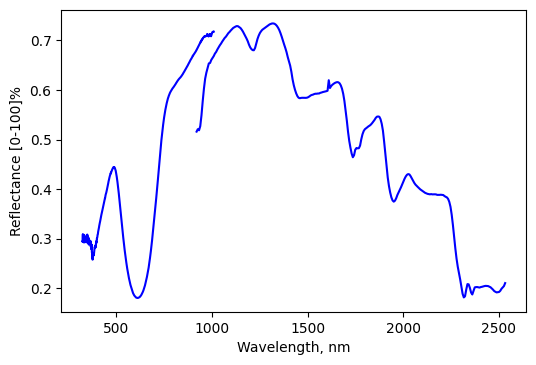

In [240]:
plt.plot(waves, corrected, "b")
plt.plot(waves_ir, corrected_ir, "b")
plt.xlabel('Wavelength, nm')
plt.ylabel('Reflectance [0-100]%')
plt.show()

In [ ]:
######## save a copy #######
blue7 = corrected.copy()
blue7_ir = corrected_ir.copy()
waves7 = waves.copy()
waves7_ir = waves_ir.copy()

# Painting No.1


In [165]:
path = '/content/drive/MyDrive/ASI/savedata/paintings_Virgin_Mary_0010/capture'
[vis_raw, vis_hdr, white_raw, white_hdr, dark_raw, dark_hdr ] = readDir(path)

2144 1080 2667


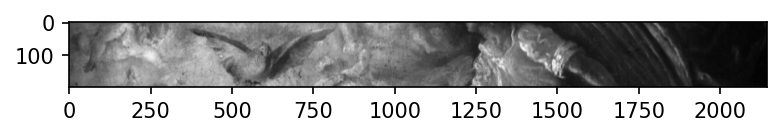

In [166]:
[samples, bands, lines, waves] = read_hdr(vis_hdr)
vis_cut1 = resize(vis_raw,samples,bands,500,200)
plt.rcParams['figure.dpi'] = 150
plt.imshow(vis_cut1[:,450,:], cmap="gray") #vmin=0, vmax=13000)#
plt.show()

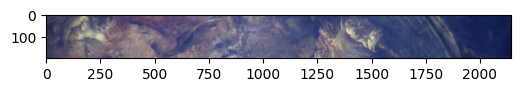

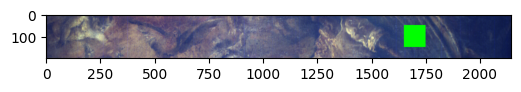

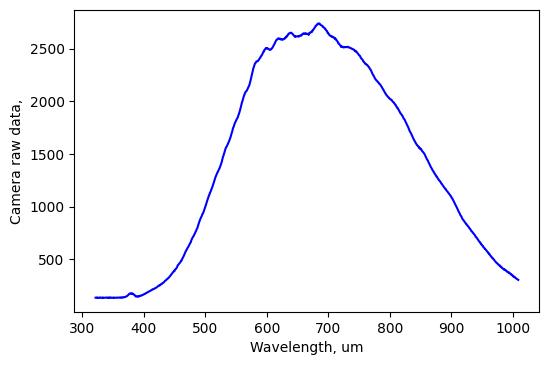

In [167]:
RGB1 = np.empty((200, samples, 3))
RGB_preview(320,238,147,RGB1,vis_cut1)
draw_square(1650,1750,50,150,RGB1)
blue1 = choose_region(1650,1750,50,150,vis_cut1)
plt.plot(waves, blue1, "b")
plt.xlabel('Wavelength, um')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()

2144 1080 442


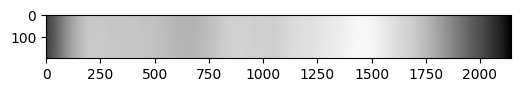

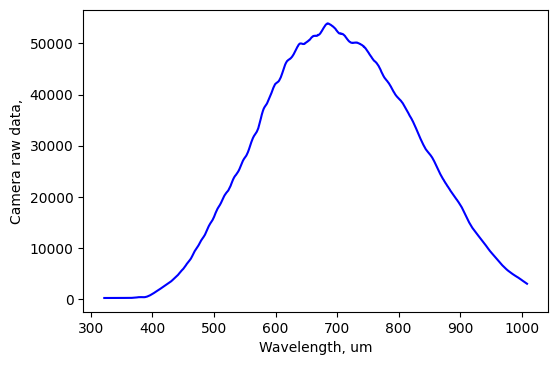

2144 1080 100


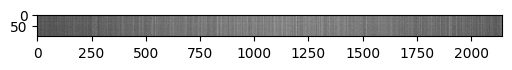

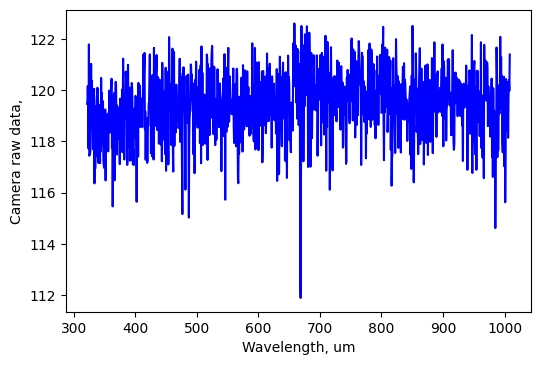

In [170]:
[samples, bands, lines, waves_white1] = read_hdr(white_hdr)
white1 = resize(white_raw,samples,bands,0,200)
plt.rcParams['figure.dpi'] = 100
plt.imshow(white1[:,500,:], cmap="gray")#
plt.show()
blue1_white = choose_region(1650,1750,50,150,white1)
plt.plot(waves_white1, blue1_white, "b")
plt.xlabel('Wavelength, um')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()
[samples, bands, lines, waves_dark1] = read_hdr(dark_hdr)
dark1 = resize(dark_raw,samples,bands,0,lines)
plt.rcParams['figure.dpi'] = 100
plt.imshow(dark1[:,500,:], cmap="gray")#
plt.show()
blue1_dark = choose_region(1650,1750,0,100,dark1)
plt.plot(waves_dark1, blue1_dark, "b")
plt.xlabel('Wavelength, um')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()

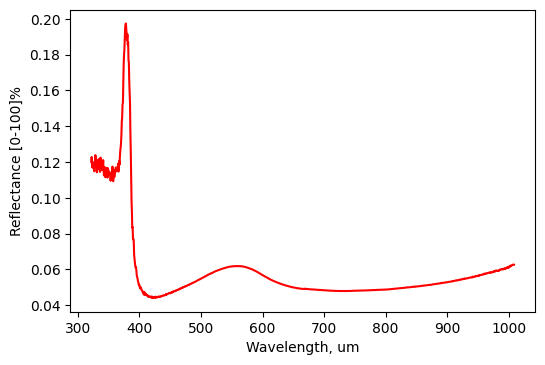

In [171]:
corrected = (blue1-blue1_dark)/(blue1_white-blue1_dark)
plt.plot(waves, corrected, "r")

plt.xlabel('Wavelength, um')
plt.ylabel('Reflectance [0-100]%')
plt.show()

In [172]:
path = '/content/drive/MyDrive/ASI/savedata/IR_paintings_Virgin_Mary_0011/capture'
[ir_raw, ir_hdr, white_raw_ir, white_hdr_ir, dark_raw_ir, dark_hdr_ir] = readDir(path)

320 256 884


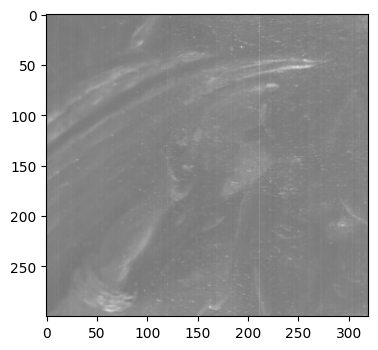

In [175]:
[samples_ir, bands_ir, lines_ir, waves_ir] = read_hdr(ir_hdr)
ir_cut1 = resize(ir_raw,samples_ir,bands_ir,200,300)
plt.rcParams['figure.dpi'] = 100
plt.imshow(ir_cut1[:,100,:], cmap="gray", vmin=0, vmax=13000)#
plt.show()

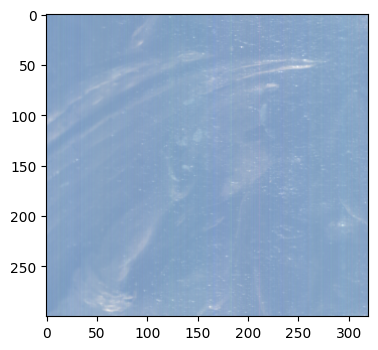

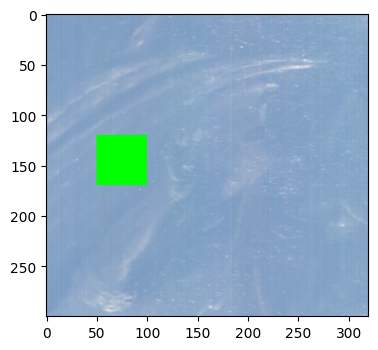

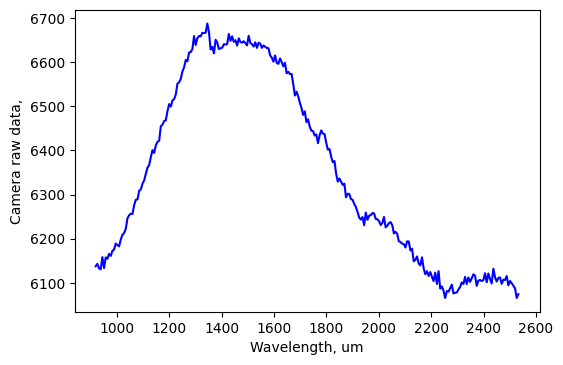

In [213]:
RGB1_ir = np.empty((300, samples_ir, 3))
RGB_preview(100,150,200,RGB1_ir,ir_cut1)
draw_square(50,100,120,170,RGB1_ir)
blue1_ir = choose_region(50,100,120,170,ir_cut1)
plt.plot(waves_ir, blue1_ir, "b")
plt.xlabel('Wavelength, um')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()

320 256 69


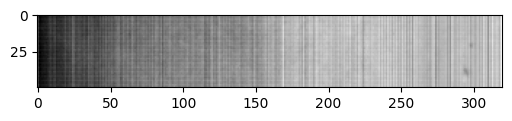

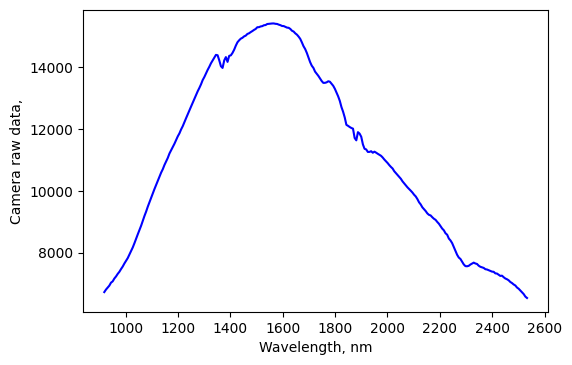

320 256 100


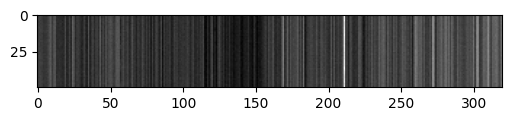

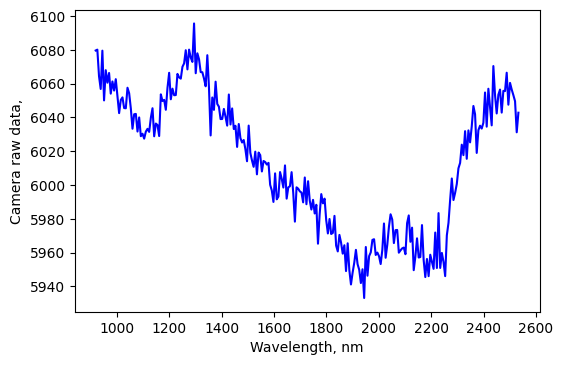

In [224]:
[samples, bands, lines, waves_white1_ir] = read_hdr(white_hdr_ir)
white1_ir = resize(white_raw_ir,samples,bands,0,50)
plt.rcParams['figure.dpi'] = 100
plt.imshow(white1_ir[:,100,:], cmap="gray")#
plt.show()
blue1_white_ir = choose_region(50,100,0,50,white1_ir)
plt.plot(waves_white1_ir, blue1_white_ir, "b")
plt.xlabel('Wavelength, nm')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()
[samples, bands, lines, waves_dark1_ir] = read_hdr(dark_hdr_ir)
dark1_ir = resize(dark_raw_ir,samples,bands,0,50)
plt.rcParams['figure.dpi'] = 100
plt.imshow(dark1_ir[:,100,:], cmap="gray")#
plt.show()
blue1_dark_ir = choose_region(50,100,0,50,dark1_ir)
plt.plot(waves_dark1_ir, blue1_dark_ir, "b")
plt.xlabel('Wavelength, nm')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()

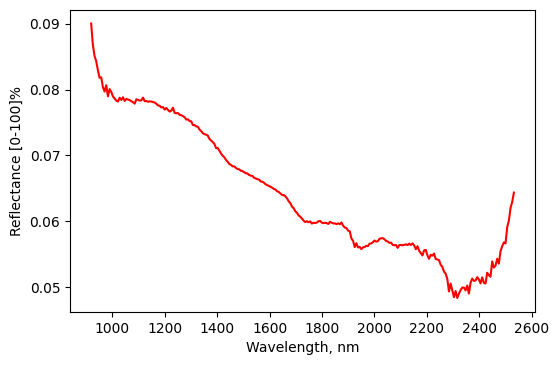

In [225]:
corrected_ir = (blue1_ir-blue1_dark_ir)/(blue1_white_ir-blue1_dark_ir)
plt.plot(waves_ir, corrected_ir, "r")

plt.xlabel('Wavelength, nm')
plt.ylabel('Reflectance [0-100]%')
plt.show()

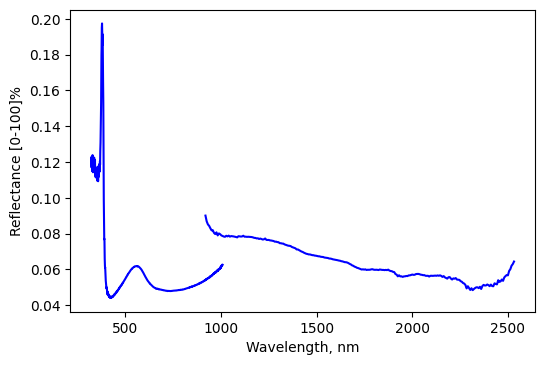

In [226]:
plt.plot(waves, corrected, "b")
plt.plot(waves_ir, corrected_ir, "b")
plt.xlabel('Wavelength, nm')
plt.ylabel('Reflectance [0-100]%')
plt.show()

In [227]:
######## save a copy #######
blue1 = corrected.copy()
blue1_ir = corrected_ir.copy()
waves1 = waves.copy()
waves1_ir = waves_ir.copy()

# Painting No.3

In [28]:
path = '/content/drive/MyDrive/ASI/savedata/paintings_Christophorus_0012/capture'
[vis_raw, vis_hdr, white_raw, white_hdr, dark_raw, dark_hdr ] = readDir(path)

2144 540 3598


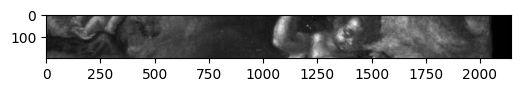

In [31]:
[samples, bands, lines, waves] = read_hdr(vis_hdr)
vis_cut1 = resize(vis_raw,samples,bands,800,200)
plt.rcParams['figure.dpi'] = 100
plt.imshow(vis_cut1[:,450,:], cmap="gray") #vmin=0, vmax=13000)#
plt.show()

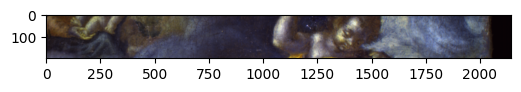

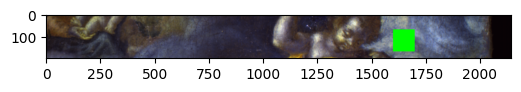

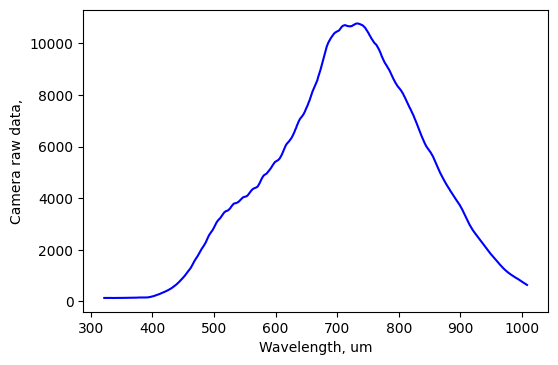

In [41]:
RGB1 = np.empty((200, samples, 3))
RGB_preview(491,348,163,RGB1,vis_cut1)
draw_square(1600,1700,70,170,RGB1)
blue1 = choose_region(1600,1700,70,170,vis_cut1)
plt.plot(waves, blue1, "b")
plt.xlabel('Wavelength, um')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()

2144 540 441


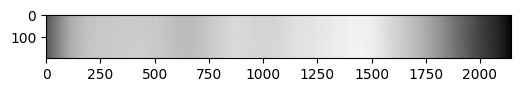

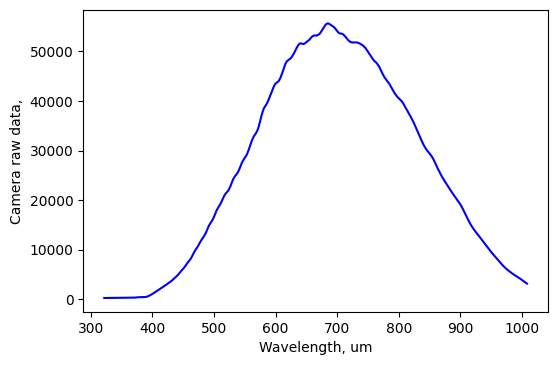

2144 540 100


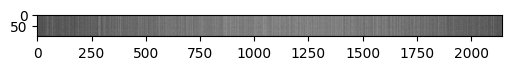

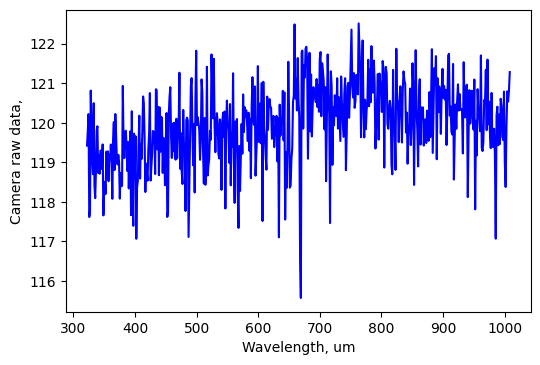

In [46]:
[samples, bands, lines, waves_white1] = read_hdr(white_hdr)
white1 = resize(white_raw,samples,bands,0,200)
plt.rcParams['figure.dpi'] = 100
plt.imshow(white1[:,500,:], cmap="gray")#
plt.show()
blue1_white = choose_region(1600,1700,100,200,white1)
plt.plot(waves_white1, blue1_white, "b")
plt.xlabel('Wavelength, um')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()
[samples, bands, lines, waves_dark1] = read_hdr(dark_hdr)
dark1 = resize(dark_raw,samples,bands,0,lines)
plt.rcParams['figure.dpi'] = 100
plt.imshow(dark1[:,500,:], cmap="gray")#
plt.show()
blue1_dark = choose_region(1600,1700,0,100,dark1)
plt.plot(waves_dark1, blue1_dark, "b")
plt.xlabel('Wavelength, um')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()

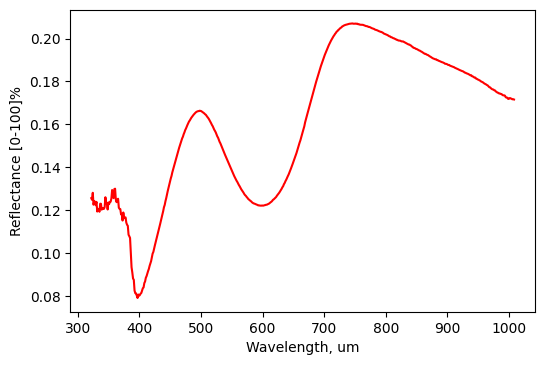

In [47]:
corrected = (blue1-blue1_dark)/(blue1_white-blue1_dark)
plt.plot(waves, corrected, "r")

plt.xlabel('Wavelength, um')
plt.ylabel('Reflectance [0-100]%')
plt.show()


IR

In [44]:
path = '/content/drive/MyDrive/ASI/savedata/IR_paintings_Christophorus_0012/capture'
[ir_raw, ir_hdr, white_raw_ir, white_hdr_ir, dark_raw_ir, dark_hdr_ir] = readDir(path)

320 256 957


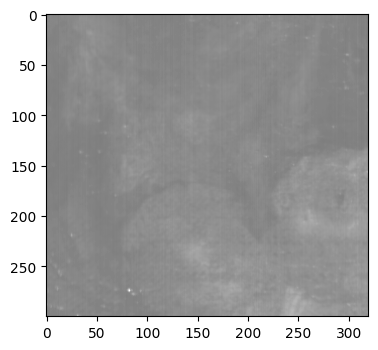

In [45]:
[samples_ir, bands_ir, lines_ir, waves_ir] = read_hdr(ir_hdr)
ir_cut1 = resize(ir_raw,samples_ir,bands_ir,300,300)
plt.rcParams['figure.dpi'] = 100
plt.imshow(ir_cut1[:,130,:], cmap="gray", vmin=0, vmax=13000)#
plt.show()

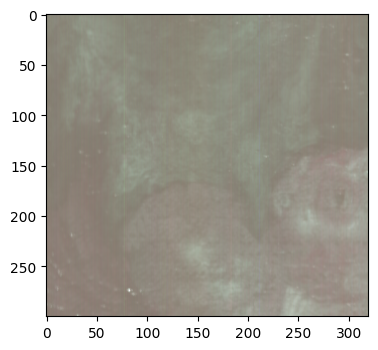

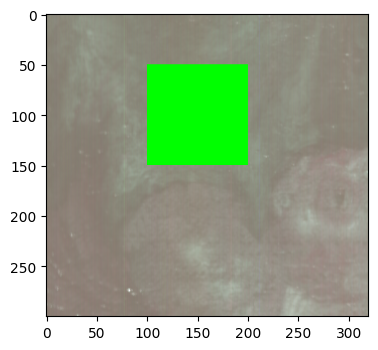

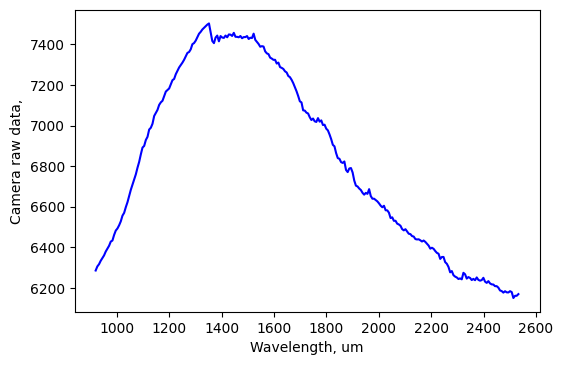

In [48]:
RGB1_ir = np.empty((300, samples_ir, 3))
RGB_preview(150,80,100,RGB1_ir,ir_cut1)
draw_square(100,200,50,150,RGB1_ir)
blue1_ir = choose_region(100,200,50,150,ir_cut1)
plt.plot(waves_ir, blue1_ir, "b")
plt.xlabel('Wavelength, um')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()

320 256 70


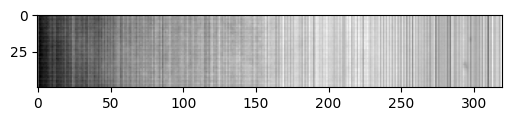

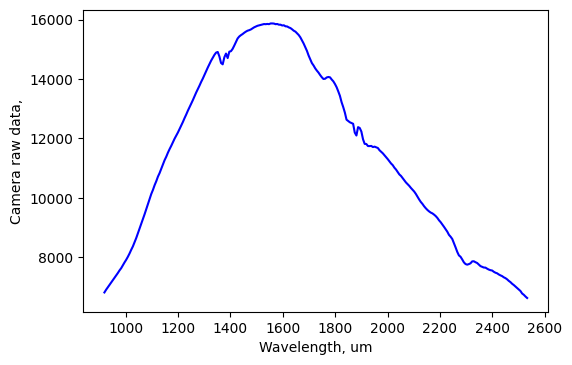

320 256 100


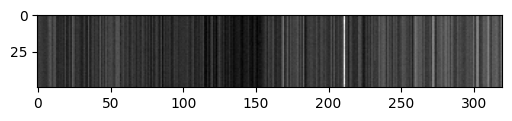

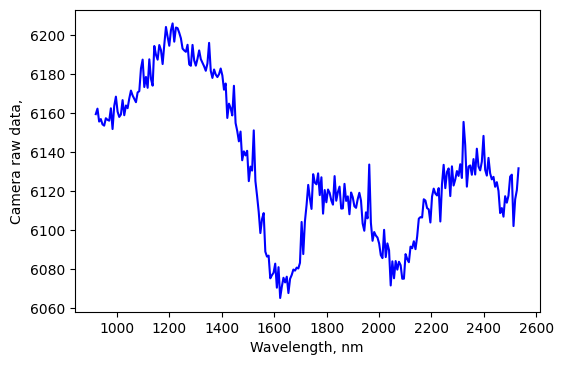

In [49]:
[samples, bands, lines, waves_white1_ir] = read_hdr(white_hdr_ir)
white1_ir = resize(white_raw_ir,samples,bands,0,50)
plt.rcParams['figure.dpi'] = 100
plt.imshow(white1_ir[:,100,:], cmap="gray")#
plt.show()
blue1_white_ir = choose_region(100,200,0,50,white1_ir)
plt.plot(waves_white1_ir, blue1_white_ir, "b")
plt.xlabel('Wavelength, um')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()
[samples, bands, lines, waves_dark1_ir] = read_hdr(dark_hdr_ir)
dark1_ir = resize(dark_raw_ir,samples,bands,0,50)
plt.rcParams['figure.dpi'] = 100
plt.imshow(dark1_ir[:,100,:], cmap="gray")#
plt.show()
blue1_dark_ir = choose_region(100,200,0,50,dark1_ir)
plt.plot(waves_dark1_ir, blue1_dark_ir, "b")
plt.xlabel('Wavelength, nm')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()

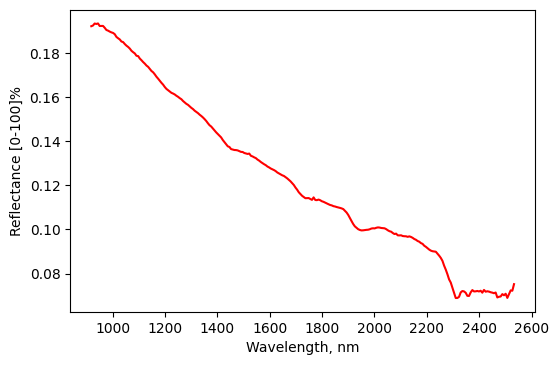

In [50]:
corrected_ir = (blue1_ir-blue1_dark_ir)/(blue1_white_ir-blue1_dark_ir)
plt.plot(waves_ir, corrected_ir, "r")

plt.xlabel('Wavelength, nm')
plt.ylabel('Reflectance [0-100]%')
plt.show()

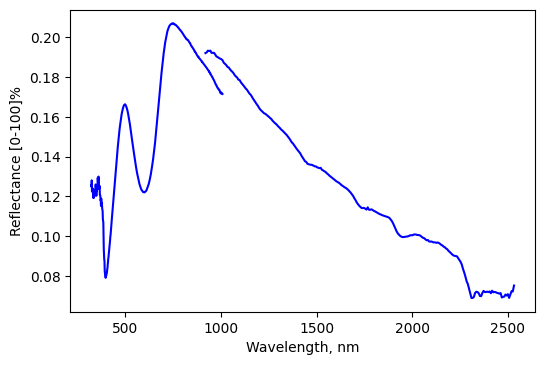

In [51]:
plt.plot(waves, corrected, "b")
plt.plot(waves_ir, corrected_ir, "b")
plt.xlabel('Wavelength, nm')
plt.ylabel('Reflectance [0-100]%')
plt.show()

In [ ]:
######## save a copy #######
blue3 = corrected.copy()
blue3_ir = corrected_ir.copy()
waves3 = waves.copy()
waves3_ir = waves_ir.copy()

# Painting No.5

In [72]:
path = '/content/drive/MyDrive/ASI/savedata/paintings_StJerome_0013/capture'
[vis_raw, vis_hdr, white_raw, white_hdr, dark_raw, dark_hdr ] = readDir(path)

2144 540 1821


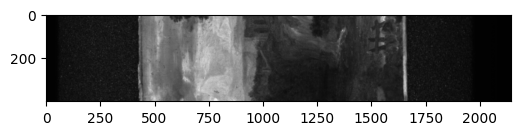

In [78]:
[samples, bands, lines, waves] = read_hdr(vis_hdr)
vis_cut1 = resize(vis_raw,samples,bands,600,400)
plt.rcParams['figure.dpi'] = 100
plt.imshow(vis_cut1[:,450,:], cmap="gray") #vmin=0, vmax=13000)#
plt.show()

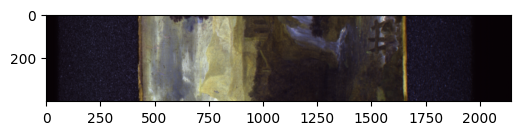

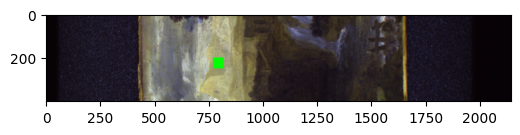

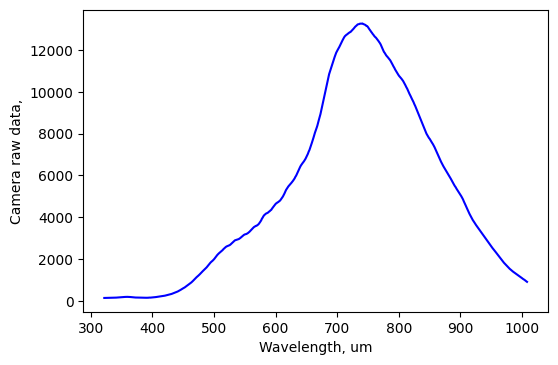

In [83]:
RGB1 = np.empty((400, samples, 3))
RGB_preview(491,348,163,RGB1,vis_cut1)
draw_square(770,820,200,250,RGB1)
blue1 = choose_region(770,820,200,250,vis_cut1)
plt.plot(waves, blue1, "b")
plt.xlabel('Wavelength, um')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()

2144 540 443


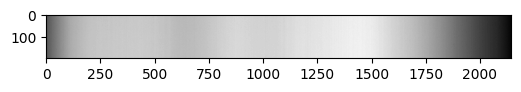

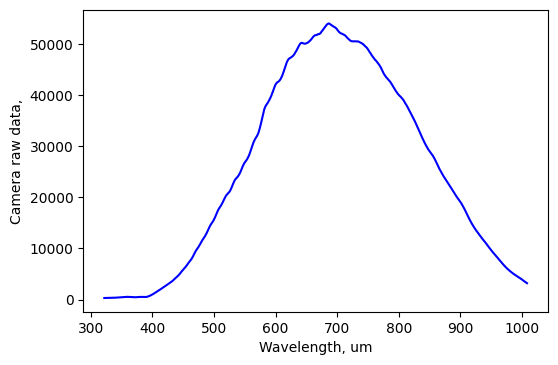

2144 540 100


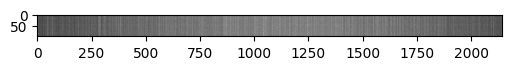

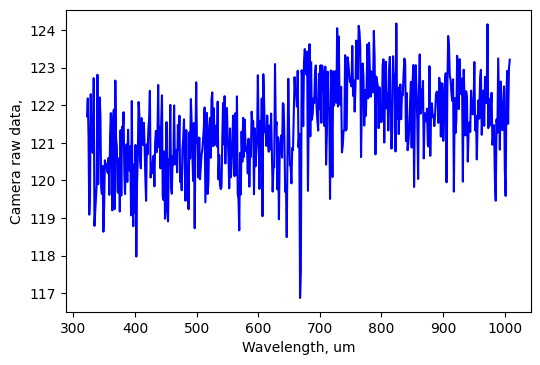

In [84]:
[samples, bands, lines, waves_white1] = read_hdr(white_hdr)
white1 = resize(white_raw,samples,bands,0,200)
plt.rcParams['figure.dpi'] = 100
plt.imshow(white1[:,500,:], cmap="gray")#
plt.show()
blue1_white = choose_region(770,820,100,200,white1)
plt.plot(waves_white1, blue1_white, "b")
plt.xlabel('Wavelength, um')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()
[samples, bands, lines, waves_dark1] = read_hdr(dark_hdr)
dark1 = resize(dark_raw,samples,bands,0,lines)
plt.rcParams['figure.dpi'] = 100
plt.imshow(dark1[:,500,:], cmap="gray")#
plt.show()
blue1_dark = choose_region(770,820,0,100,dark1)
plt.plot(waves_dark1, blue1_dark, "b")
plt.xlabel('Wavelength, um')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()

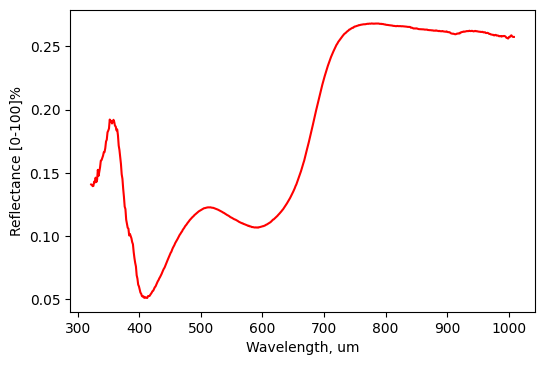

In [85]:
corrected = (blue1-blue1_dark)/(blue1_white-blue1_dark)
plt.plot(waves, corrected, "r")

plt.xlabel('Wavelength, um')
plt.ylabel('Reflectance [0-100]%')
plt.show()

IR

In [52]:
path = '/content/drive/MyDrive/ASI/savedata/IR_paintings_StJerome/capture'
[ir_raw, ir_hdr, white_raw_ir, white_hdr_ir, dark_raw_ir, dark_hdr_ir] = readDir(path)

320 256 884


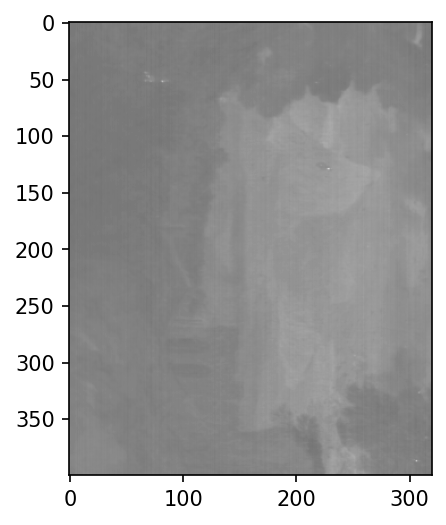

In [60]:
[samples_ir, bands_ir, lines_ir, waves_ir] = read_hdr(ir_hdr)
ir_cut1 = resize(ir_raw,samples_ir,bands_ir,300,400)
plt.rcParams['figure.dpi'] = 150
plt.imshow(ir_cut1[:,50,:], cmap="gray", vmin=0, vmax=13000)#
plt.show()

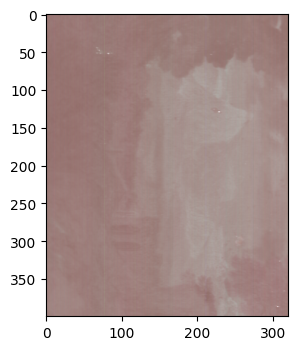

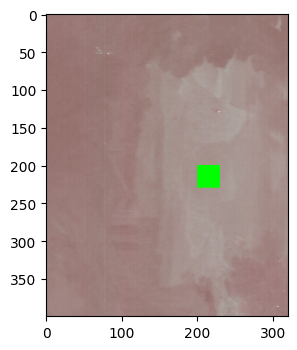

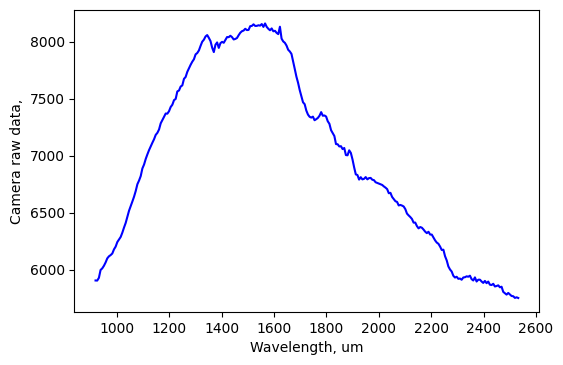

In [68]:
RGB1_ir = np.empty((400, samples_ir, 3))
RGB_preview(170,80,100,RGB1_ir,ir_cut1)
draw_square(200,230,200,230,RGB1_ir)
blue1_ir = choose_region(200,230,200,230,ir_cut1)
plt.plot(waves_ir, blue1_ir, "b")
plt.xlabel('Wavelength, um')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()

320 256 69


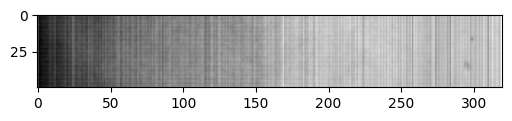

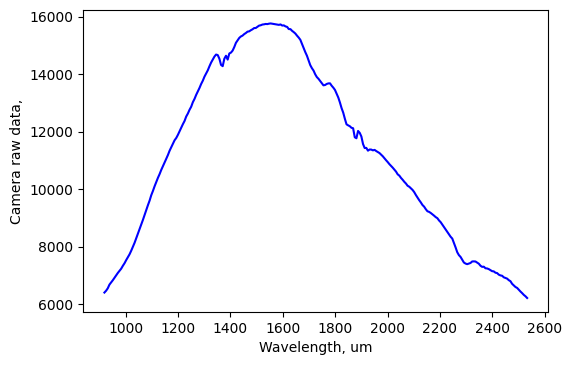

320 256 100


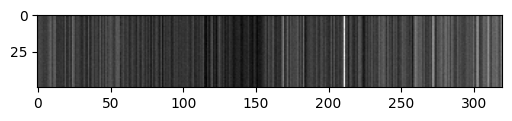

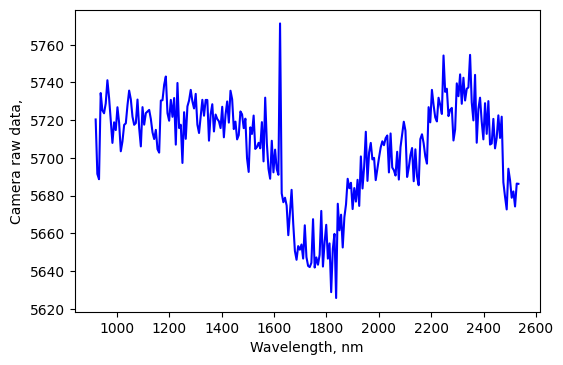

In [69]:
[samples, bands, lines, waves_white1_ir] = read_hdr(white_hdr_ir)
white1_ir = resize(white_raw_ir,samples,bands,0,50)
plt.rcParams['figure.dpi'] = 100
plt.imshow(white1_ir[:,100,:], cmap="gray")#
plt.show()
blue1_white_ir = choose_region(200,230,0,50,white1_ir)
plt.plot(waves_white1_ir, blue1_white_ir, "b")
plt.xlabel('Wavelength, um')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()
[samples, bands, lines, waves_dark1_ir] = read_hdr(dark_hdr_ir)
dark1_ir = resize(dark_raw_ir,samples,bands,0,50)
plt.rcParams['figure.dpi'] = 100
plt.imshow(dark1_ir[:,100,:], cmap="gray")#
plt.show()
blue1_dark_ir = choose_region(200,230,0,50,dark1_ir)
plt.plot(waves_dark1_ir, blue1_dark_ir, "b")
plt.xlabel('Wavelength, nm')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()

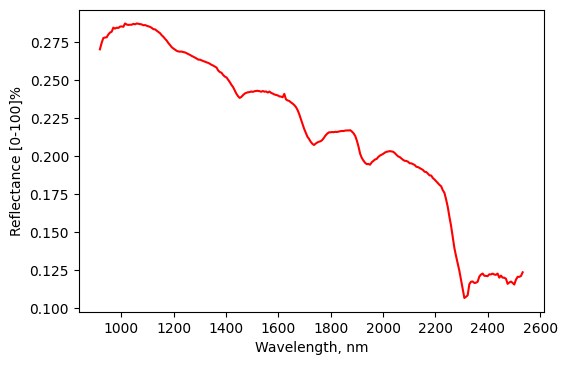

In [70]:
corrected_ir = (blue1_ir-blue1_dark_ir)/(blue1_white_ir-blue1_dark_ir)
plt.plot(waves_ir, corrected_ir, "r")

plt.xlabel('Wavelength, nm')
plt.ylabel('Reflectance [0-100]%')
plt.show()

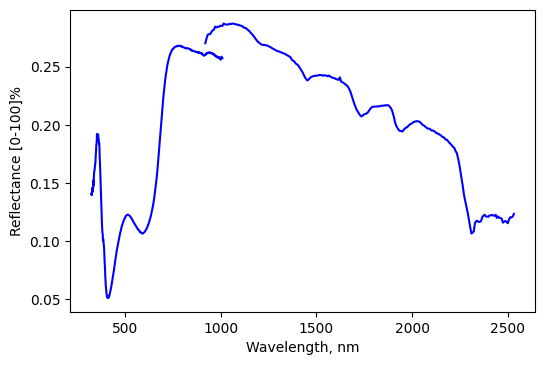

In [86]:
plt.plot(waves, corrected, "b")
plt.plot(waves_ir, corrected_ir, "b")
plt.xlabel('Wavelength, nm')
plt.ylabel('Reflectance [0-100]%')
plt.show()

In [ ]:
######## save a copy #######
blue5 = corrected.copy()
blue5_ir = corrected_ir.copy()
waves5 = waves.copy()
waves5_ir = waves_ir.copy()

# IR for Painting No.4?

320 256 885


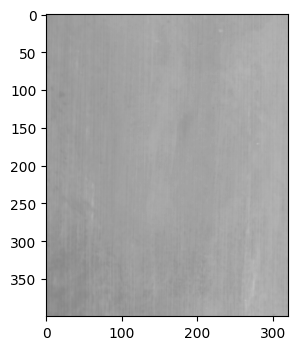

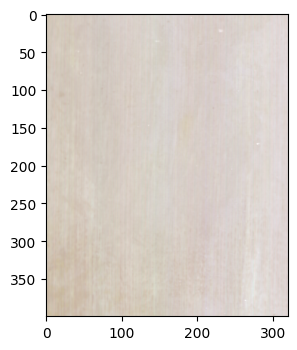

In [95]:
path = '/content/drive/MyDrive/ASI/savedata/IR_IR1_0021/capture'
[ir_raw, ir_hdr, white_raw_ir, white_hdr_ir, dark_raw_ir, dark_hdr_ir] = readDir(path)
[samples_ir, bands_ir, lines_ir, waves_ir] = read_hdr(ir_hdr)
ir_cut1 = resize(ir_raw,samples_ir,bands_ir,300,400)
plt.rcParams['figure.dpi'] = 100
plt.imshow(ir_cut1[:,50,:], cmap="gray", vmin=0, vmax=13000)#
plt.show()
RGB1_ir = np.empty((400, samples_ir, 3))
RGB_preview(170,140,100,RGB1_ir,ir_cut1)

320 256 884


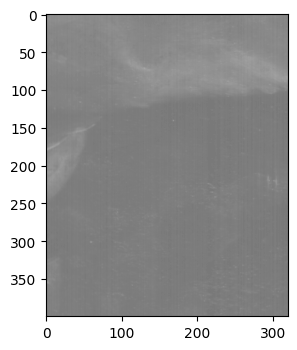

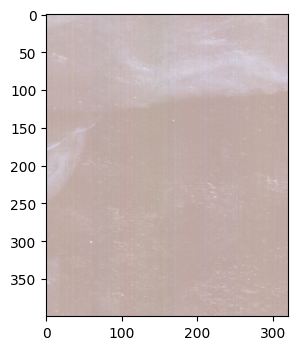

In [94]:
path = '/content/drive/MyDrive/ASI/savedata/IR_IR1_0022/capture'
[ir_raw, ir_hdr, white_raw_ir, white_hdr_ir, dark_raw_ir, dark_hdr_ir] = readDir(path)
[samples_ir, bands_ir, lines_ir, waves_ir] = read_hdr(ir_hdr)
ir_cut1 = resize(ir_raw,samples_ir,bands_ir,300,400)
plt.rcParams['figure.dpi'] = 100
plt.imshow(ir_cut1[:,50,:], cmap="gray", vmin=0, vmax=13000)#
plt.show()
RGB1_ir = np.empty((400, samples_ir, 3))
RGB_preview(170,140,100,RGB1_ir,ir_cut1)

320 256 883


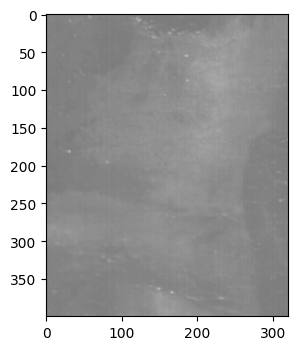

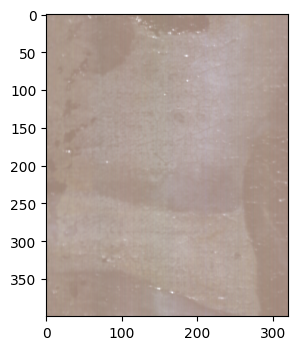

In [96]:
path = '/content/drive/MyDrive/ASI/savedata/IR_IR1_0024/capture'
[ir_raw, ir_hdr, white_raw_ir, white_hdr_ir, dark_raw_ir, dark_hdr_ir] = readDir(path)
[samples_ir, bands_ir, lines_ir, waves_ir] = read_hdr(ir_hdr)
ir_cut1 = resize(ir_raw,samples_ir,bands_ir,300,400)
plt.rcParams['figure.dpi'] = 100
plt.imshow(ir_cut1[:,50,:], cmap="gray", vmin=0, vmax=13000)#
plt.show()
RGB1_ir = np.empty((400, samples_ir, 3))
RGB_preview(170,140,100,RGB1_ir,ir_cut1)